In [2]:
# Import libraries and objects
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore') # mute warning messages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random

In [4]:
# Read the pre processed data set into the data frame
df = pd.read_csv('../../data/processed/credit_risk_dataset_processed.csv')
df.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,person_credit_default,person_credit_history
count,28495.000000,2.849500e+04,28495.000000,28495.000000,28495.000000,28495.000000,28495.000000,28495.000000,28495.000000,28495.000000,28495.000000
mean,27.723530,6.643047e+04,2.438919,4.781751,3.290121,9657.366205,11.045220,0.217126,0.169517,0.178593,5.800316
std,6.177199,5.151374e+04,0.636709,4.037958,1.717692,6327.711290,3.230786,0.412296,0.106379,0.383018,4.040800
min,20.000000,4.000000e+03,1.000000,0.000000,1.000000,500.000000,5.420000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,2.000000,2.000000,5000.000000,7.900000,0.000000,0.090000,0.000000,3.000000
50%,26.000000,5.600000e+04,3.000000,4.000000,3.000000,8000.000000,10.990000,0.000000,0.150000,0.000000,4.000000
75%,30.000000,8.000000e+04,3.000000,7.000000,5.000000,12500.000000,13.480000,0.000000,0.230000,0.000000,8.000000
max,84.000000,2.039784e+06,4.000000,41.000000,6.000000,35000.000000,23.220000,1.000000,0.830000,1.000000,30.000000


In [17]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'person_credit_default', 'person_credit_history'],
      dtype='object')

## As part this Loan Segmentation classification will be analysing the following,
 - how the Loan grades are classified
 - what factors are being affected by the loan grade

In [18]:
df['loan_grade'].unique()

array(['B', 'C', 'A', 'D', 'E', 'F', 'G'], dtype=object)

With an iterative approach, the dataset columns were dropped from existing column list for predictor selection
Initially, all columns were selected as predictors except for loan_grade and loan_status, the accuracy was around 80 to 85%
Iteratively, tried dropping columns one by one from the predictors which improved the accuracy.  
This approach helped in finding strong correlation that exists between loan_grade and loan_int_rate. The accuracy raised to 97%

In [19]:
# predictors (X)
predictors = df.drop(['loan_grade', 'loan_status', 'loan_intent', 'person_age', 'person_emp_length','loan_percent_income', 'loan_amnt', 'person_income', 'person_home_ownership', 'person_credit_default','person_credit_history'], axis=1)

# Standardize the predictors
scaler = StandardScaler()
predictors_standardized = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

random.seed(67)
# Create a random vector to split the dataset for training and testing
split = np.random.choice([True, False], size=len(predictors_standardized), replace=True, p=[0.75, 0.25])

# Define the training set for X (predictors)
training_X = predictors_standardized[split]

# Define the training set for Y (response)
training_Y = df.loc[split, 'loan_grade']

# Define the testing set for X (predictors)
testing_X = predictors_standardized[~split]

# Define the testing set for Y (response)
testing_Y = df.loc[~split, 'loan_grade']

# fit and predict the classification model
knn1 = KNeighborsClassifier(n_neighbors = 4)
knn1.fit(training_X, training_Y)
knn1_pred = knn1.predict(testing_X)

# prediction accuracy rate
accuracy = accuracy_score(testing_Y, knn1_pred)
print(f'accuracy: {accuracy}')

# prediction error rate
errorrate = 1 - accuracy
print(f'errorrate: {errorrate}')

accuracy: 0.975718671504326
errorrate: 0.024281328495673993


The accuracy of the model is best when the neighbours = 4, the accuracy marginally decreases when the bucket group is set to 7 to match with the number of grades

In [20]:
knn1 = KNeighborsClassifier(n_neighbors = 7)
knn1.fit(training_X, training_Y)
knn1_pred = knn1.predict(testing_X)

# prediction accuracy rate
accuracy = accuracy_score(testing_Y, knn1_pred)
print(f'accuracy: {accuracy}')

# prediction error rate
errorrate = 1 - accuracy
print(f'errorrate: {errorrate}')

accuracy: 0.9692994697181133
errorrate: 0.030700530281886684


In [21]:
# confusion table shows how many times the model predicts the grade correctly with the test data
from ISLP import confusion_table

confusion_table(testing_Y, knn1_pred)

Truth,A,B,C,D,E,F,G
Predicted,,,,,,,
A,2248,52,0,0,0,0,0
B,0,2280,5,0,0,0,0
C,0,43,1397,2,0,2,0
D,0,4,21,773,25,2,0
E,0,0,8,22,205,1,1
F,0,0,1,10,11,36,4
G,0,0,0,0,1,5,7


The confusion table shows the number of data tested for each grade goes down especially for grades E, F and G

In [22]:
from sklearn.metrics import classification_report


print(classification_report(testing_Y, knn1_pred))

              precision    recall  f1-score   support

           A       1.00      0.98      0.99      2300
           B       0.96      1.00      0.98      2285
           C       0.98      0.97      0.97      1444
           D       0.96      0.94      0.95       825
           E       0.85      0.86      0.86       237
           F       0.78      0.58      0.67        62
           G       0.58      0.54      0.56        13

    accuracy                           0.97      7166
   macro avg       0.87      0.84      0.85      7166
weighted avg       0.97      0.97      0.97      7166



The classification report shows the precision for each grade in over all is good, however 
the percision goes down with the grade, this may be because the data by loan grade is **Imbalanced**

## The below histogram shows that the Loan Grade is broadly classified by the interest rate range

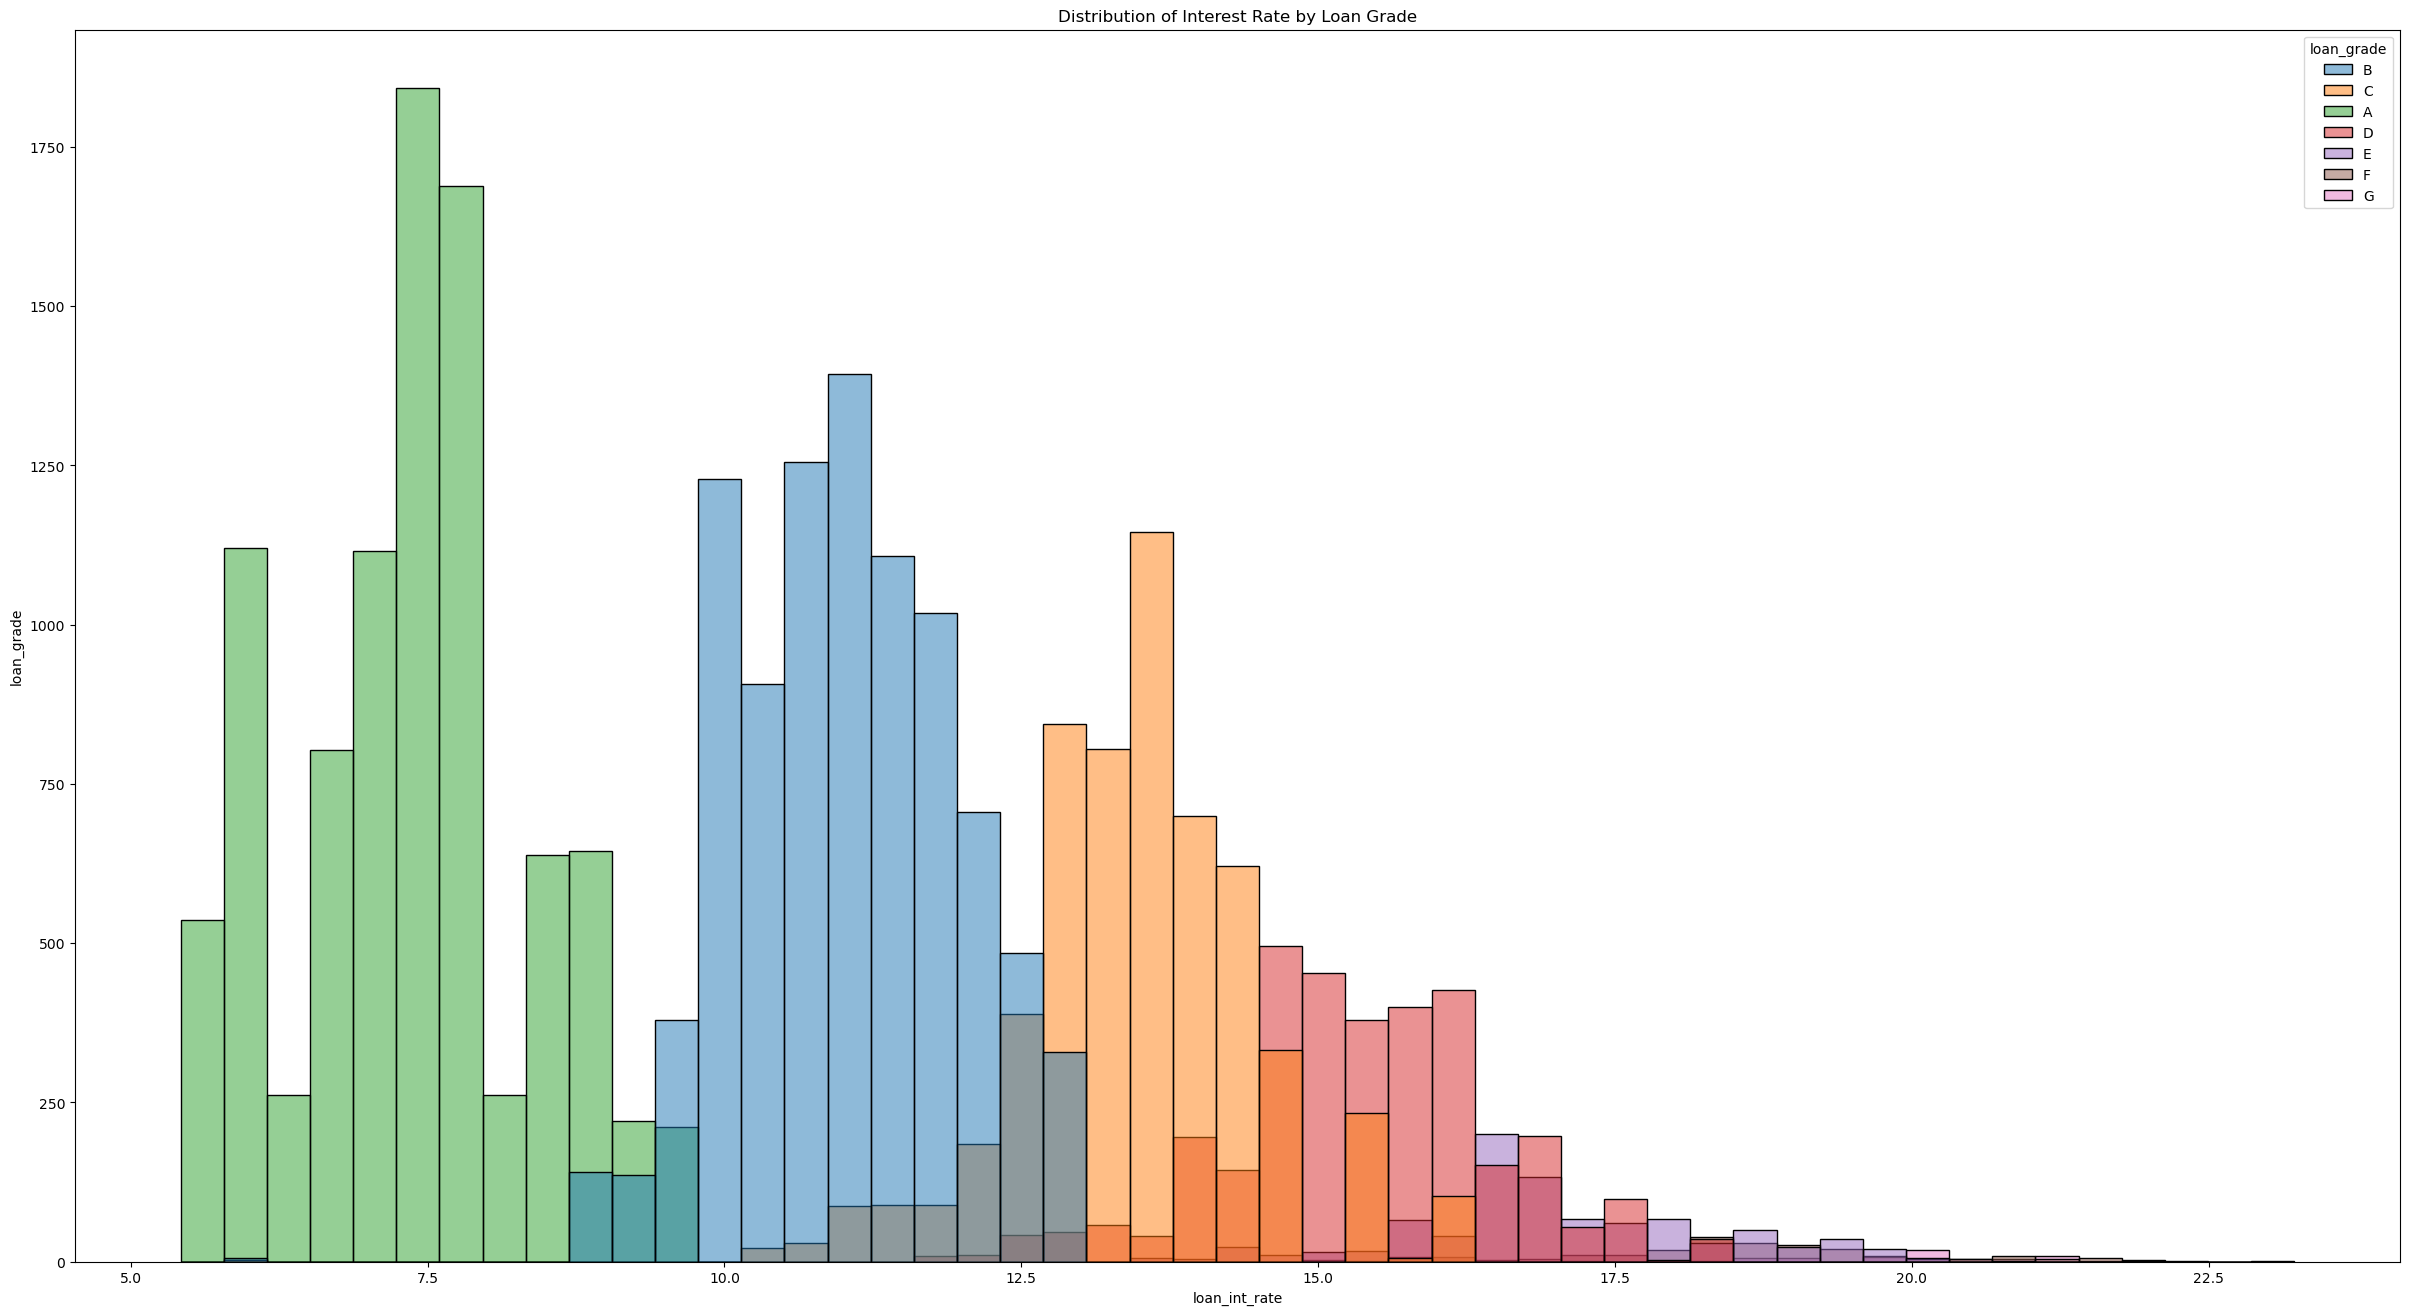

In [6]:
import seaborn as sns

plt.figure(figsize=(30, 16))
sns.histplot(data=df, x='loan_int_rate', hue='loan_grade')
plt.title(f'Distribution of Interest Rate by Loan Grade')
plt.xlabel('loan_int_rate')
plt.ylabel('loan_grade')
plt.show()

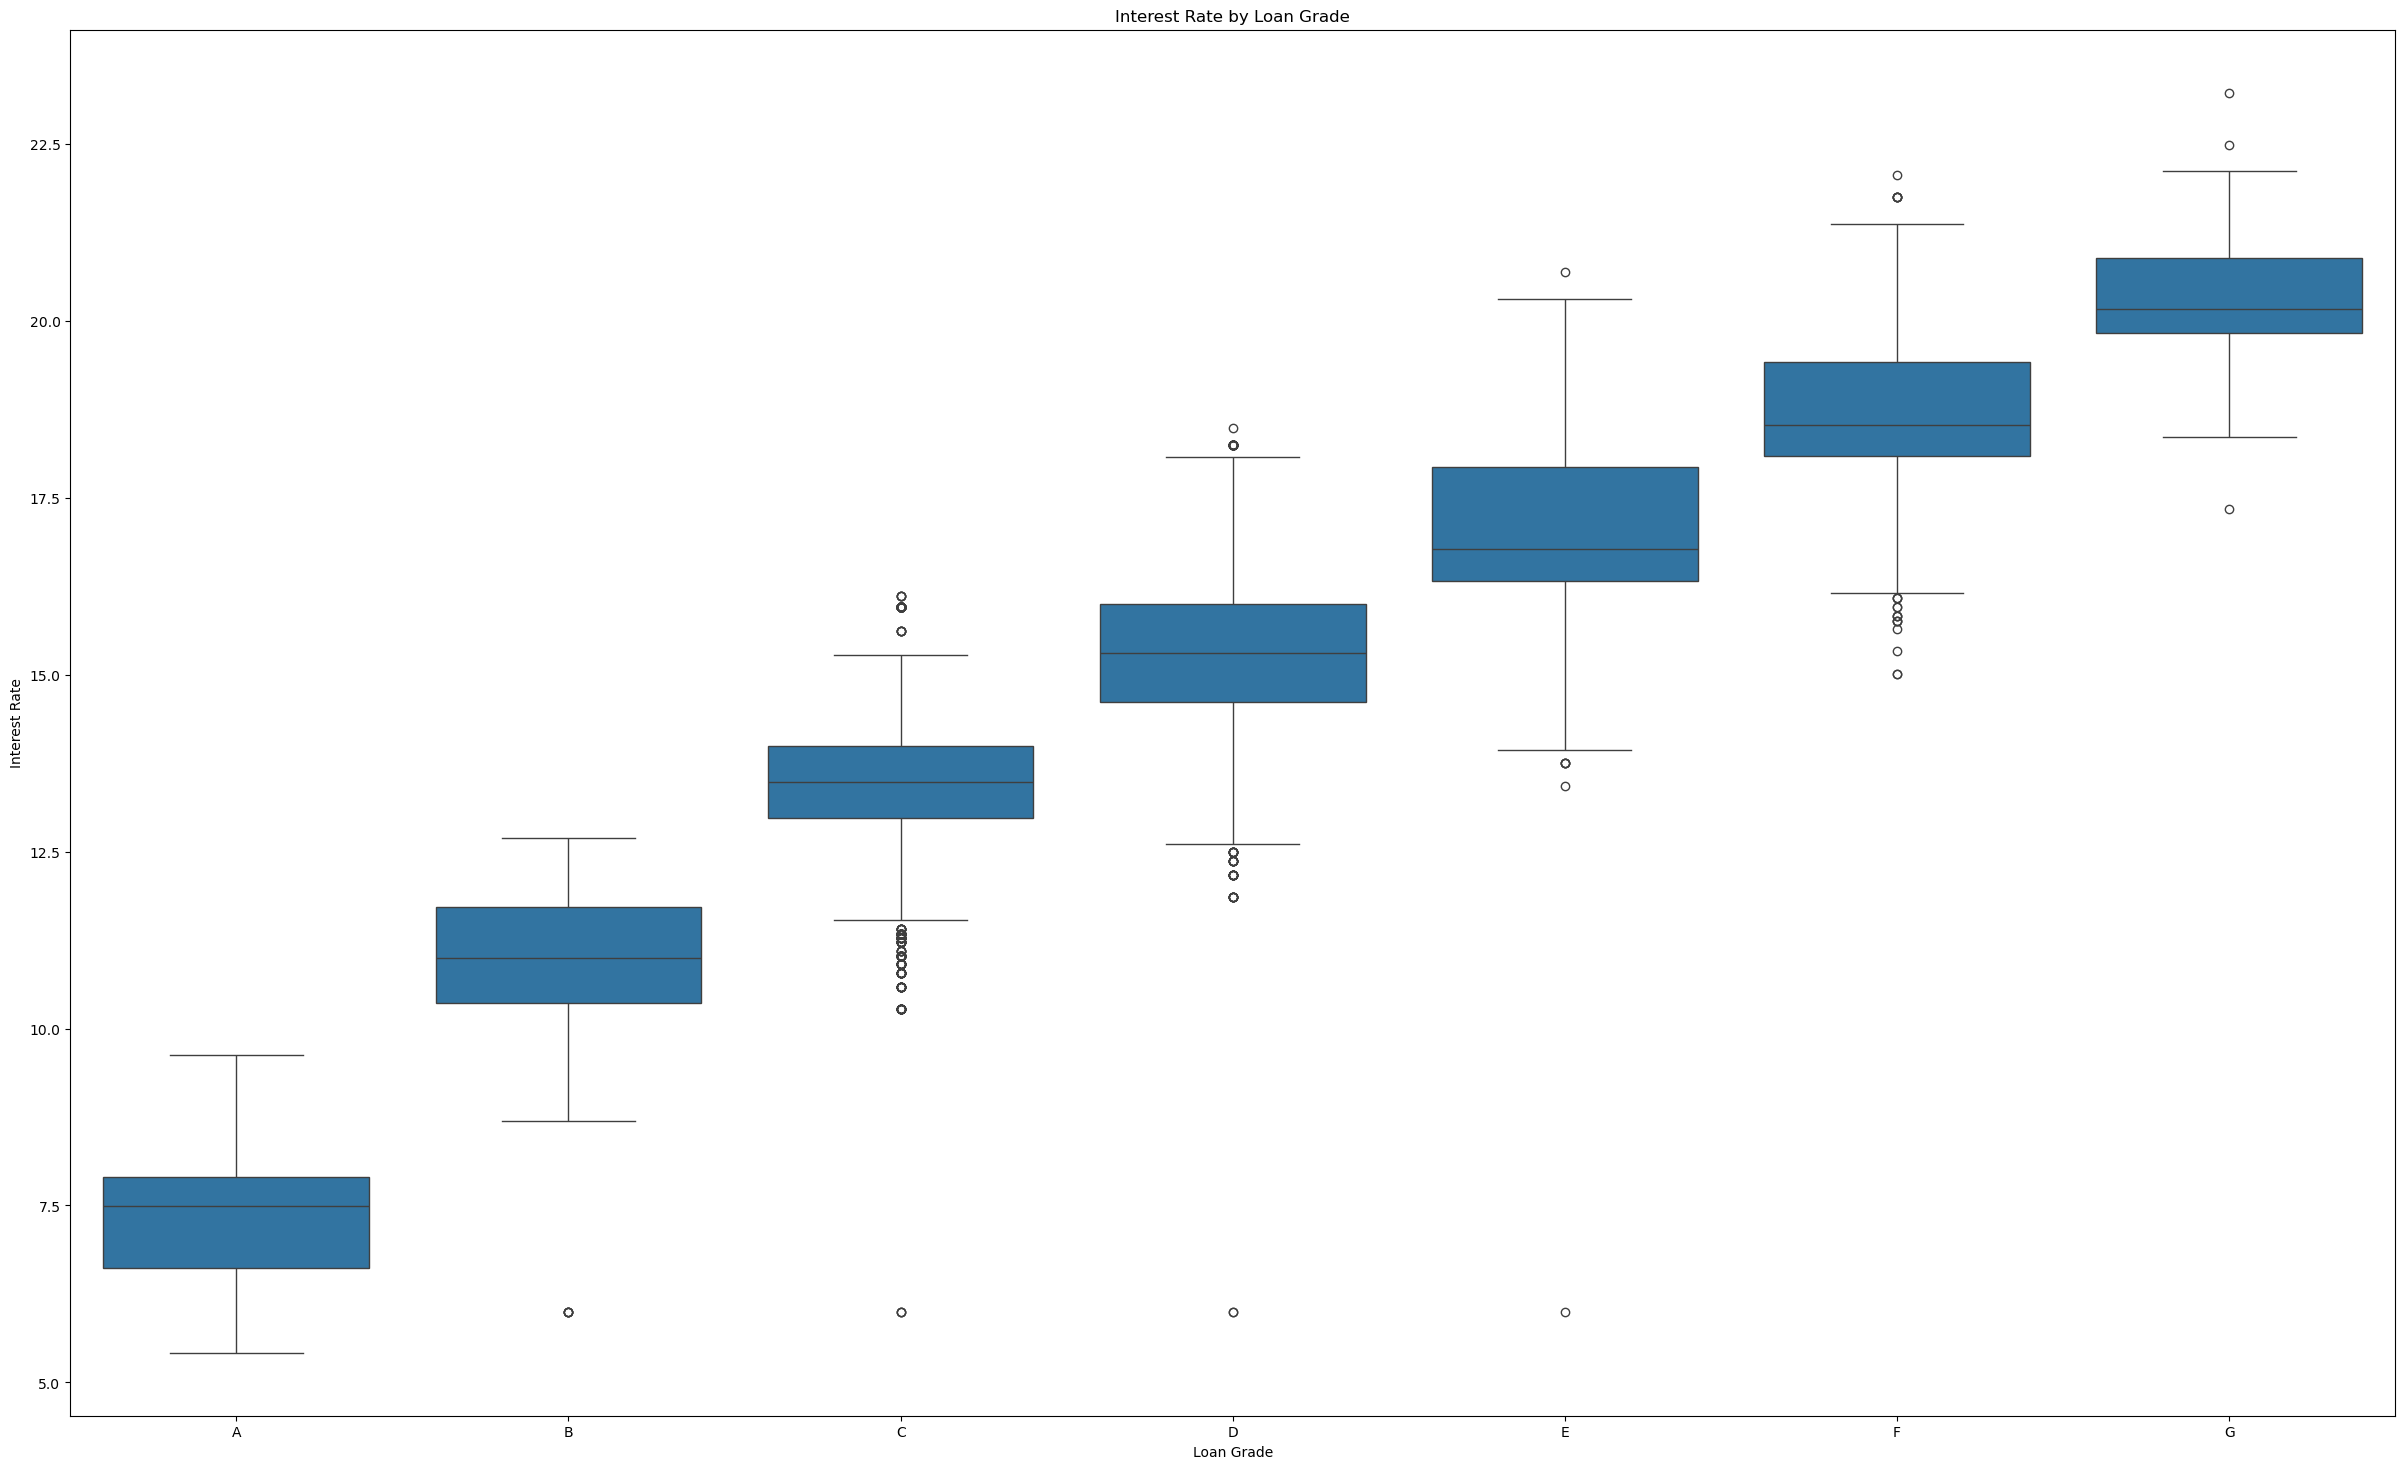

In [10]:
# Boxplot to visualize the distribution of interest rates across loan grades
plt.figure(figsize=(30, 18))
sns.boxplot(x='loan_grade', y='loan_int_rate', data=df, order = sorted(df['loan_grade'].unique()))
plt.title('Interest Rate by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate')
plt.show()

The below figure shows the data by loan grade is imbalanced, we are aiming to balance the data and train the model again to see if the model would perform well for all Grades

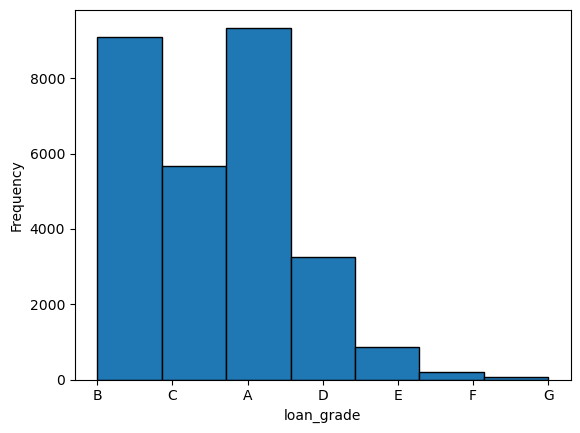

In [24]:
plt.hist(df['loan_grade'], bins=7, edgecolor='black')
plt.xlabel('loan_grade')
plt.ylabel('Frequency')
plt.show()

## Boot strapping

To balance the dataset with the data of loan grade E, F and G using the bootstrapping technique to create random samples from same dataset.
These random samples are added back to the original dataset to balance the data with loan grades E, F and G

In [35]:
seed = 42
B = 10
rng = np.random.default_rng(seed)
n = 200
filter = df.loc[(df['loan_grade'] == 'D') | (df['loan_grade'] == 'E') | (df['loan_grade'] == 'F') | (df['loan_grade'] == 'G')]

for i in range(B):
    idx = rng.choice(filter, n, replace=True)
    df = pd.concat([df,pd.DataFrame(idx, columns= df.columns)], axis=0)
    
newdf = df

In [36]:
newdf.shape

(32495, 12)

The dataset balancing has been improved with resampling, the model is fitted and trained again to see if it increases the accuracy for the loan_grade 'E', 'F' and 'G'. From the below confusion table, you can see the data being tested for intended grades have increased. From the classification report, you can confirm that the accuracy has imrpoved for the Grades which had a lower accuracy before balancing the data.

In [37]:

predictors = newdf.drop(['loan_grade', 'loan_status', 'loan_intent', 'person_age', 'person_emp_length','loan_percent_income', 'loan_amnt', 'person_income', 'person_home_ownership', 'person_credit_default','person_credit_history'], axis=1)
scaler = StandardScaler()
predictors_standardized = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

random.seed(67)
# Create a random vector for splitting dataset
split = np.random.choice([True, False], size=len(predictors_standardized), replace=True, p=[0.75, 0.25])

# Define the training set for X (predictors)
training_X = predictors_standardized[split]

# Define the training set for Y (response)
training_Y = newdf.loc[split, 'loan_grade']

# Define the testing set for X (predictors)
testing_X = predictors_standardized[~split]

# Define the testing set for Y (response)
testing_Y = newdf.loc[~split, 'loan_grade']

knn1 = KNeighborsClassifier(n_neighbors=4)
knn1.fit(training_X, training_Y)
knn1_pred = knn1.predict(testing_X)

# prediction accuracy rate
accuracy = accuracy_score(testing_Y, knn1_pred)
print(f'accuracy: {accuracy}')

# prediction error rate
errorrate = 1 - accuracy
print(f'errorrate: {errorrate}')

accuracy: 0.967687074829932
errorrate: 0.03231292517006801


In [38]:
confusion_table(testing_Y, knn1_pred)

Truth,A,B,C,D,E,F,G
Predicted,,,,,,,
A,2286,54,0,0,0,0,0
B,0,2269,3,0,0,0,0
C,0,49,1405,2,0,0,0
D,0,3,13,1071,5,0,0
E,0,0,10,102,706,0,0
F,0,0,3,17,2,173,0
G,0,0,0,0,2,1,56


In [39]:
print(classification_report(testing_Y, knn1_pred))

              precision    recall  f1-score   support

           A       1.00      0.98      0.99      2340
           B       0.96      1.00      0.98      2272
           C       0.98      0.96      0.97      1456
           D       0.90      0.98      0.94      1092
           E       0.99      0.86      0.92       818
           F       0.99      0.89      0.94       195
           G       1.00      0.95      0.97        59

    accuracy                           0.97      8232
   macro avg       0.97      0.95      0.96      8232
weighted avg       0.97      0.97      0.97      8232



## Conclusion
From the above analysis using the classification model we are able to make it out that there is a strong correlation exists between Loan grade and loan interest rate. The grade of the loan declines alphabetically from A to G, the lower the grade assigned to the Loan, the higher the rate of interest assigned to the loan. 

This analysis has helped in understanding how these loan features would affect the credit risk and loan default in future. Since both loan_grade and loan_int_rate has strong affinity it would make sense to have only one column included in the parameter selection for Loan default model which would be carried out in the Data Modeling section of the project.